## Task 3: Breast Cancer Prediction

### Objective 

#### The goal of this task is to develop and evaluate predictive models that classify breast cancer cells as malignant or benign. Specifically, the models implemented include Logistic Regression, Decision Tree, and a Feed Forward Deep Neural Network (DNN). Additionally, this task aims to identify key features that influence cell classification, providing insights into which cellular characteristics are strongly associated with malignancy.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv("data/Cancer_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We observed 569 rows and 33 columns in the breast cancer dataset. In this task, we keep only the `diagnosis` and all the `feature_mean` columns.

In [3]:
df = df.drop(columns=df.columns[12:])
df.columns = df.columns.str.replace('_mean', '', regex=False)
df = df.drop(columns='id')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) # Map 'M' to 1 and 'B' to 0 
df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#### We visualize the relationships between features in the dataset and identify which features are strongly associated with `diagnosis` using a correlation heatmap.

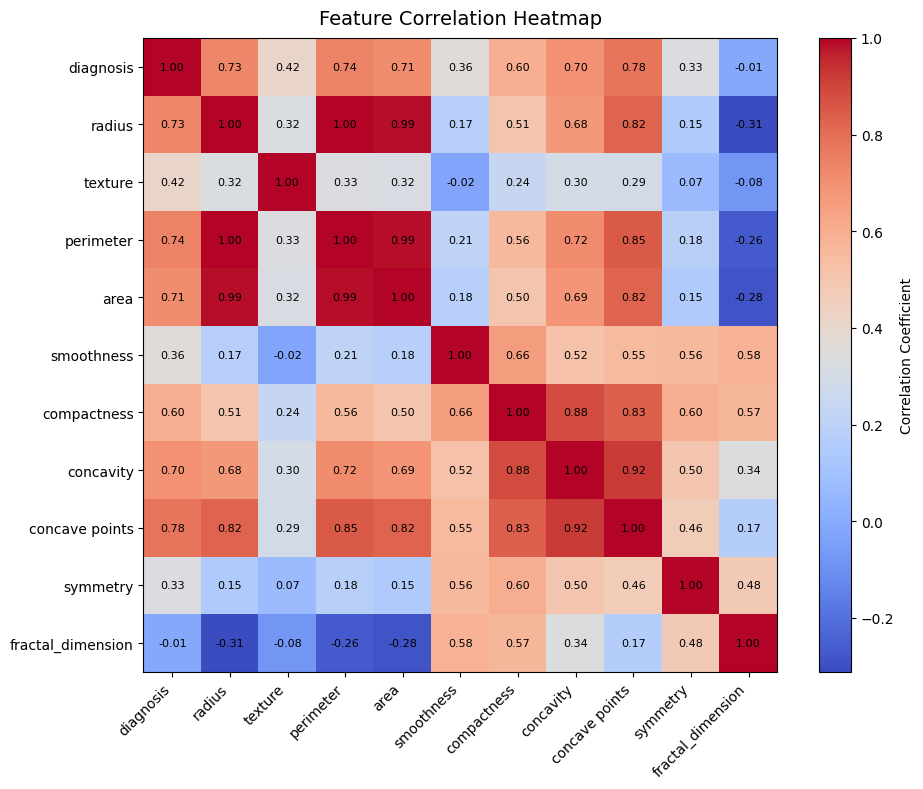

In [4]:
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Correlation Coefficient")

# Add feature names to x and y axes
tick_marks = np.arange(len(corr_matrix.columns))
plt.xticks(tick_marks, corr_matrix.columns, rotation=45, ha='right')
plt.yticks(tick_marks, corr_matrix.columns)

# Add correlation value annotations
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", color="black", fontsize=8)

plt.title("Feature Correlation Heatmap", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

#### From the heatmap, we observed that features like `radius`, `perimeter`, `area`, `concavity`, and `concave points` have strong positive correlations with `diagnosis`, indicating that larger and more irregular cells are more likely to be malignant. The `concave points` shows the highest correlation of 0.78 with `diagnosis`, suggesting a key factor in determining malignancy. In contrast, features like `texture`, `smoothness`, and `symmetry` show weaker correlations with `diagnosis`, implying a lower impact on predicting malignancy. The `fratual_dimention` shows near-zero correlation with `diagnosis`, suggesting that this feature has little to no effect on cancer classification.

In [5]:
# Separate features (X) and target variable (y)
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Split data into 80% training and 20% testing sets. Stratify ensures class balance in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Fit on training data and transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Decision tree

#### A Decision Tree is a supervised machine learning algorithm that makes predictions by splitting data into smaller groups based on feature values. The model chooses splits that maximize the separation between classes, often using measures like Gini impurity or information gain.

Decision Tree Accuracy: 0.9035

Classification Report:
               precision    recall  f1-score   support

      Benign       0.90      0.96      0.93        72
   Malignant       0.92      0.81      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



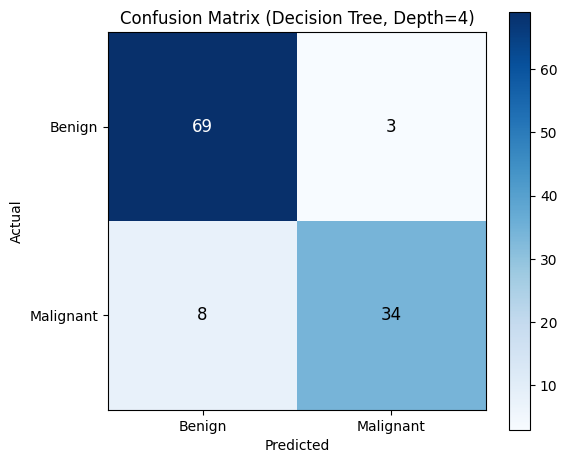

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree with max depth = 4 to prevent overfitting
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = tree_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["Benign", "Malignant"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Decision Tree, Depth=4)")
plt.colorbar()

# Tick marks and labels
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label cells with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=12)

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

#### The Decision Tree model with a maximum depth of 4 achieved an accuracy of 90.35% on the test dataset. From the classification report, the model achieved a precision of 0.90 for benign and 0.92 for malignant cases, indicating that most of the predictions made by the model are correct with few false alarms. The recall values of 0.96 for benign and 0.81 for malignant suggest that the model detects most benign samples accurately, but misses a few malignant cases. In other words, when the model predicts a tumor as malignant, it is correct about 92% of the time, but it only manages to identify about 81% of all actual malignant cases. Overall, the model performs well, but the lower recall for malignant cases indicates that some cancerous samples are being misclassified as benign, which could be critical in actual medical diagnosis.

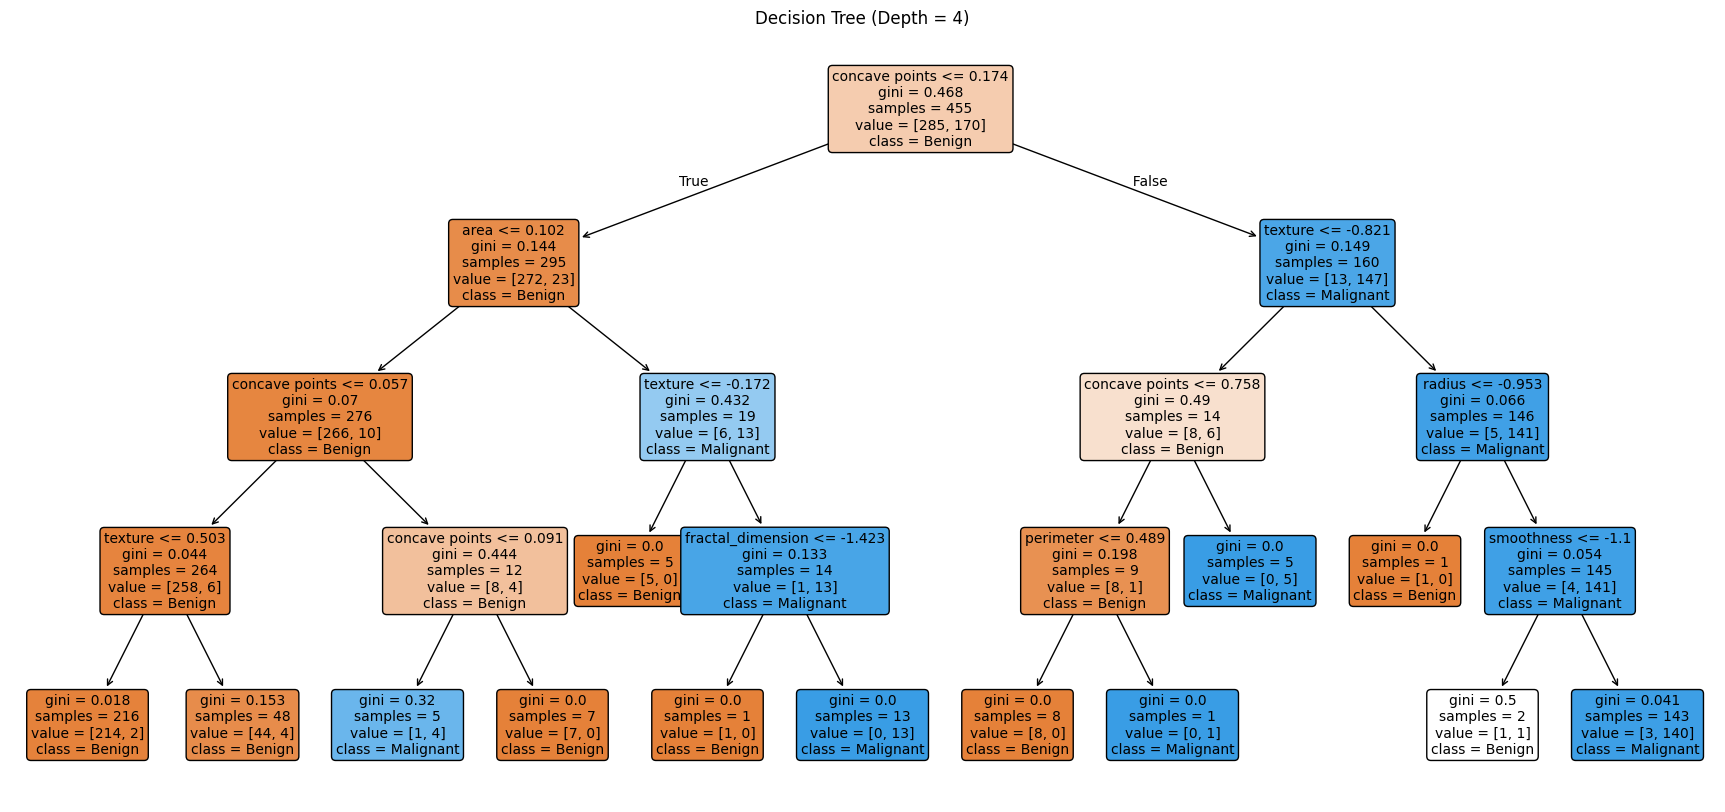

In [7]:
# Plot the decision tree
plt.figure(figsize=(22, 10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Benign", "Malignant"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Depth = 4)")
plt.show()

#### The Decision Tree visualization provides insight into how the model makes decisions. The important features used for splitting include `concave points`, `area`, `radius`, and `texture`, which aligns with earlier correlation analysis. The first split at `concave points` indicates it is the most influential feature in determining whether a tumor is benign or malignant. Each subsequent split refines the decision boundary, with leaf nodes representing the final classifications. The use of a maximum depth of 4 prevents the model from overfitting and helps it generalize better on unseen data.

### Logistic Regression

#### Logistic Regression is a supervised learning algorithm used for binary classification problems. It estimates the probability that an input belongs to a particular class by applying a logistic (sigmoid) function to a linear combination of the input features. In this task, it predicts the likelihood of a tumor being malignant or benign by finding the optimal set of coefficients (weights) that define a decision boundary in the feature space, allowing it to output probabilities between 0 and 1.

Logistics Regression Accuracy: 0.9298

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.93      0.94        72
   Malignant       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



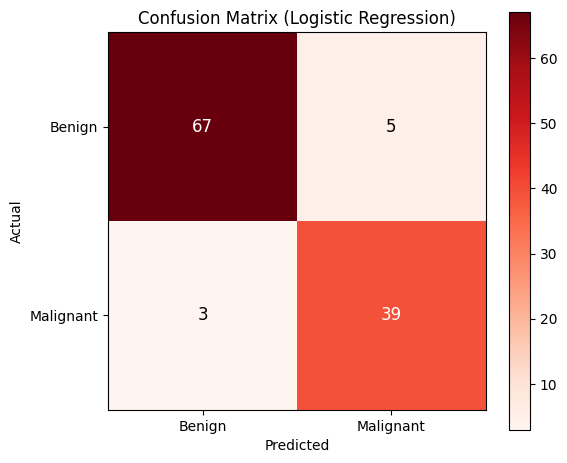

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistics Regression Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["Benign", "Malignant"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix (Logistic Regression)")
plt.colorbar()

# Tick marks and labels
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label cells with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=12)

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

#### The Logistic Regression model achieved an accuracy of 92.98% on the test dataset. Based on the classification report, the model obtained a precision of 0.96 for benign and 0.89 for malignant cases, with both classes achieving a recall of 0.93. This means that the model is highly reliable when predicting benign cases and performs consistently well in identifying malignant ones. In other words, when the model predicts a tumor as malignant, it is correct 89% of the time, and it successfully identifies 93% of all actual malignant cases. The low number of misclassifications demonstrates that the model generalizes well to unseen data and is able to maintain consistent prediction. However, we cannot afford to misclassify malignant cells as benign in actual medical diagnosis.

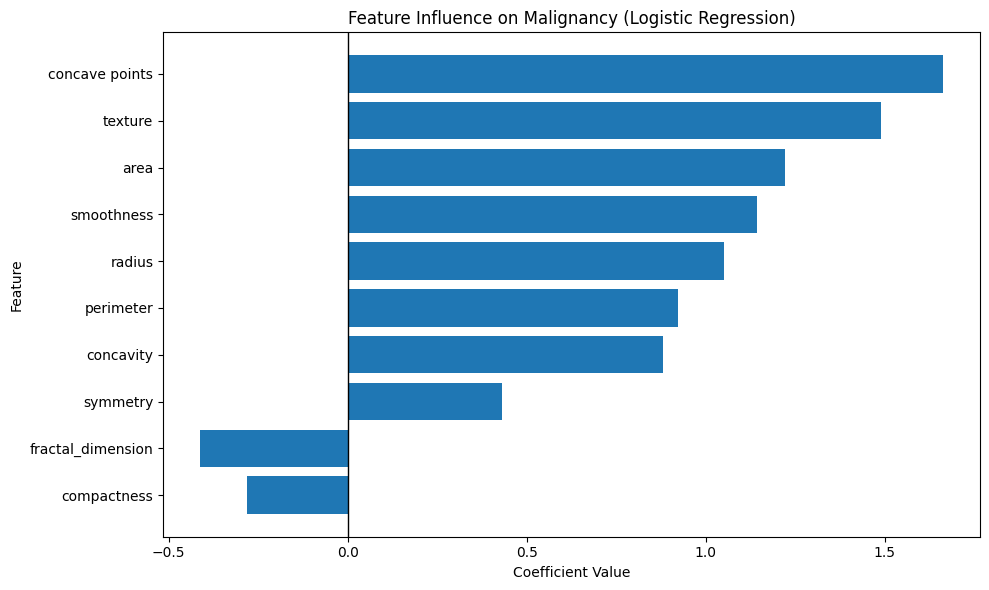

In [9]:
# Visualize feature coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
coefficients["abs_coef"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="abs_coef", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(coefficients["Feature"], coefficients["Coefficient"])
plt.axvline(0, color="black", linewidth=1)
plt.title("Feature Influence on Malignancy (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### The coefficient values indicate both the strength and direction of the relationship. A positive coefficient means that higher values of that feature increase the probability of malignancy, while a negative coefficient means that higher values make the tumor more likely to be benign. From the chart, `concave points` has the highest positive coefficient, indicating that tumors with more concave points are much more likely to be malignant. Other features such as `texture`, `area`, `smoothness`, `radius`, `perimeter`, and `concavity` also have strong positive coefficients, suggesting that larger and less uniform cell shapes are key indicators of cancerous growth. In contrast, features such as `compactness` and `fractal_dimension` have small negative coefficients, meaning that higher values of these features are slightly associated with benign tumors.

### Feed-Forward Deep Neural Network (DNN)

#### A Feed-Forward Deep Neural Network is a deep learning model made up of multiple layers of interconnected neurons. It learns complex patterns in the data by passing information forward through these layers. In this task, the DNN captures nonlinear relationships between cell features to accurately classify tumors as malignant or benign.

In [10]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Build Feed-Forward Deep Neural Network (DNN)
model = Sequential([
    Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early Stopping to prevent overtraining
early_stop = EarlyStopping(
    monitor='val_loss', # watch validation loss
    patience=10, # stop after 10 epochs with no improvement
    restore_best_weights=True
)

# Train Model with Early Stopping
EPOCHS = 200
BATCH_SIZE = 16

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200


c:\Users\Jun Sheng\OneDrive\Desktop\project 2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3978 - loss: 0.7589 - val_accuracy: 0.4298 - val_loss: 0.7153
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4637 - loss: 0.6771 - val_accuracy: 0.6140 - val_loss: 0.6540
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6264 - loss: 0.6158 - val_accuracy: 0.7193 - val_loss: 0.6113
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7077 - loss: 0.5857 - val_accuracy: 0.7632 - val_loss: 0.5789
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.5559 - val_accuracy: 0.8246 - val_loss: 0.5502
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8593 - loss: 0.5267 - val_accuracy: 0.8772 - val_loss: 0.5258
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8923 - loss: 0.5073 - val_accuracy: 0.8860 - val_loss: 0.5039
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9077 - loss: 0.4873 - val_accuracy: 0.8772 - val_loss: 0.4

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
DNN Accuracy: 0.9561

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        72
   Malignant       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



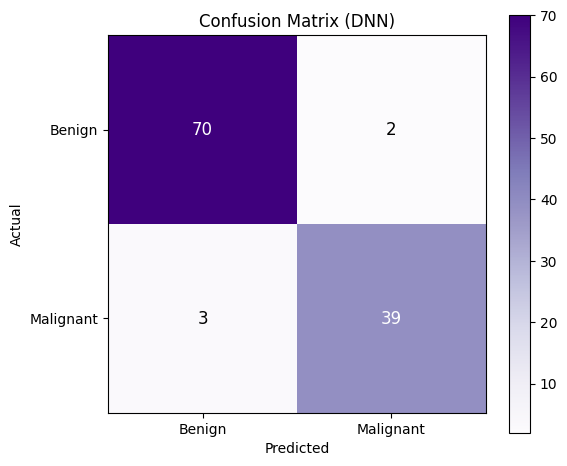

In [11]:
# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

accuracy = accuracy_score(y_test, y_pred)
print(f"DNN Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ["Benign", "Malignant"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title("Confusion Matrix (DNN)")
plt.colorbar()

# Tick marks and labels
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Label cells with counts
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=12)

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

#### The Feed-Forward Deep Neural Network (DNN) achieved an accuracy of 95.61% on the test dataset. From the classification report, both benign and malignant classes show high precision and recall values of 0.96 and 0.97 for benign, and 0.95 and 0.93 for malignant cases. This indicate that the DNN is able to learn complex non-linear relationships between features, resulting in a strong ability to distinguish between benign and malignant tumors with minimal bias toward either class. Overall, the DNN outperforms the other models in accuracy and consistency.

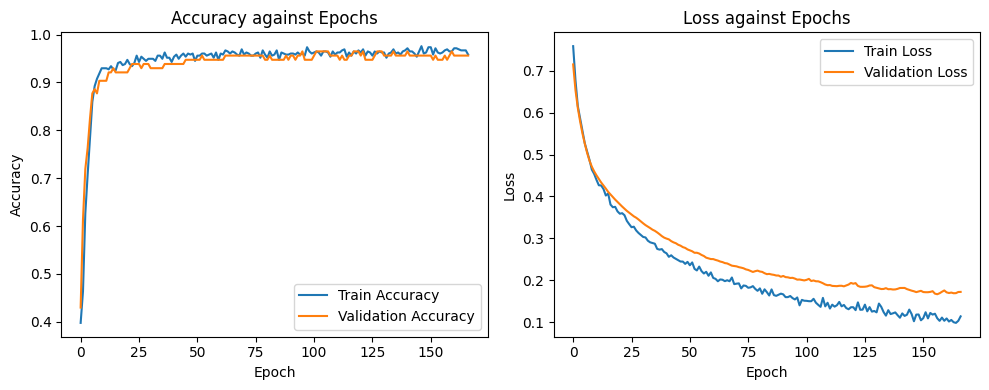

In [12]:
# Plot Accuracy & Loss Curves
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy against Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss against Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### From the accuracy vs. epochs plot, both training and validation accuracies increase rapidly in the early epochs, reaching above 90% within the first 25 epochs, and then gradually stabilize around 95% as training progresses. This shows that the model quickly learns the underlying patterns in the data and maintains consistent performance on unseen validation samples. From the loss vs. epochs plot, both training and validation losses decrease steadily over time, with the training loss slightly lower than the validation loss. This small gap indicates mild overfitting but within an acceptable range, as the validation loss continues to decrease and does not diverge. Overall, the plots demonstrate that the DNN model successfully minimizes prediction errors over time.

### Breat Cancer Prediction (Single Entry)

#### For simulation, a single patient entry is created based on cell measurement features. This entry is scaled using the same StandardScaler as the training data, and then evaluated using the Logistic Regression, Decision Tree, and Deep Neural Network (DNN) models.

In [13]:
# Create one entry
columns = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']
sample = [14.6, 19.5, 95.0, 710.0, 0.098, 0.130, 0.120, 0.070, 0.181, 0.062]
sample_df = pd.DataFrame([sample], columns=columns)
print("Single Entry:")
display(sample_df)

# Scale features using existing StandardScaler
sample_scaled = scaler.transform(sample_df)

# Predict using all the models
predictions = []

# Logistic Regression
log_prob = log_reg.predict_proba(sample_scaled)[0][1]
log_pred = 'Malignant' if log_prob >= 0.5 else 'Benign'

# Decision Tree
tree_prob = tree_model.predict_proba(sample_scaled)[0][1]
tree_pred = 'Malignant' if tree_prob >= 0.5 else 'Benign'

# Deep Neural Network
dnn_prob = float(model.predict(sample_scaled)[0][0])
dnn_pred = 'Malignant' if dnn_prob >= 0.5 else 'Benign'

# Collect results
predictions.append({
    'Model': 'Logistic Regression',
    'Predicted Class': log_pred,
    'Malignant Probability': log_prob
})
predictions.append({
    'Model': 'Decision Tree',
    'Predicted Class': tree_pred,
    'Malignant Probability': tree_prob
})
predictions.append({
    'Model': 'Deep Neural Network',
    'Predicted Class': dnn_pred,
    'Malignant Probability': dnn_prob
})

# Display Results
results_df = pd.DataFrame(predictions)
print("\nModel Predictions:")
display(results_df.round(4))


Single Entry:


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,14.6,19.5,95.0,710.0,0.098,0.13,0.12,0.07,0.181,0.062


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Model Predictions:


,Model,Predicted Class,Malignant Probability
0,Logistic Regression,Malignant,0.7644
1,Decision Tree,Malignant,0.9790
2,Deep Neural Network,Malignant,0.9742


#### The Decision Tree model produced the highest malignant probability at 0.9790, followed by the DNN at 0.9742, and Logistic Regression at 0.7644. This consistent prediction across all models suggests strong agreement that the tumor is malignant. The difference in probabilities reflects how each model interprets the data. Logistic Regression, being linear, shows moderate confidence, while the Decision Tree and DNN capture more complex nonlinear relationships, leading to higher certainty in their predictions.

### Explainable AI (XAI) in Healthcare Applications

#### In real-world context, if an AI model predicts that a patient has malignant breast cancer, it is important to understand why the model made that prediction. However, complex models like DNN are often viewed as “black boxes” because their decision-making process is not transparent or easily understood. This lack of clarity can make it difficult for doctors and patients to fully trust the results. As such, SHAP (SHapley Additive exPlanations) was applied to make the DNN model more interpretable and trustworthy by showing how each feature contributes to the prediction. By revealing which cellular characteristics most strongly influence the classification, XAI helps bridge the gap between model accuracy and human understanding, allowing medical experts to better trust, interpret, and validate the model’s decisions.

c:\Users\Jun Sheng\OneDrive\Desktop\project 2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Jun Sheng\OneDrive\Desktop\project 2\.venv\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\Jun Sheng\OneDrive\Desktop\project 2\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 10))']
  warnings.warn(msg)
c:\Users\Jun Sheng\OneDrive\Desktop\project 2\.venv\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` d

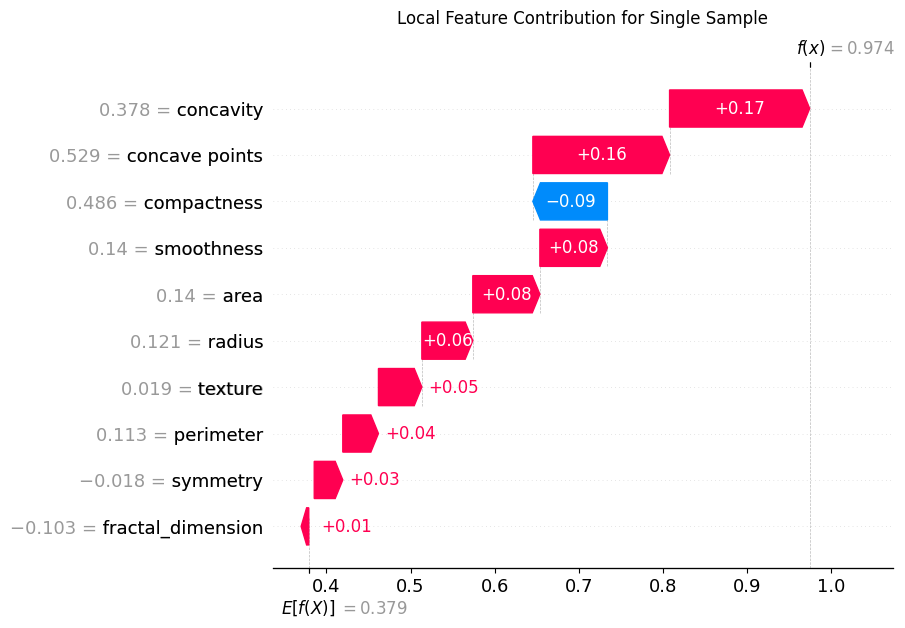

<Figure size 640x480 with 0 Axes>

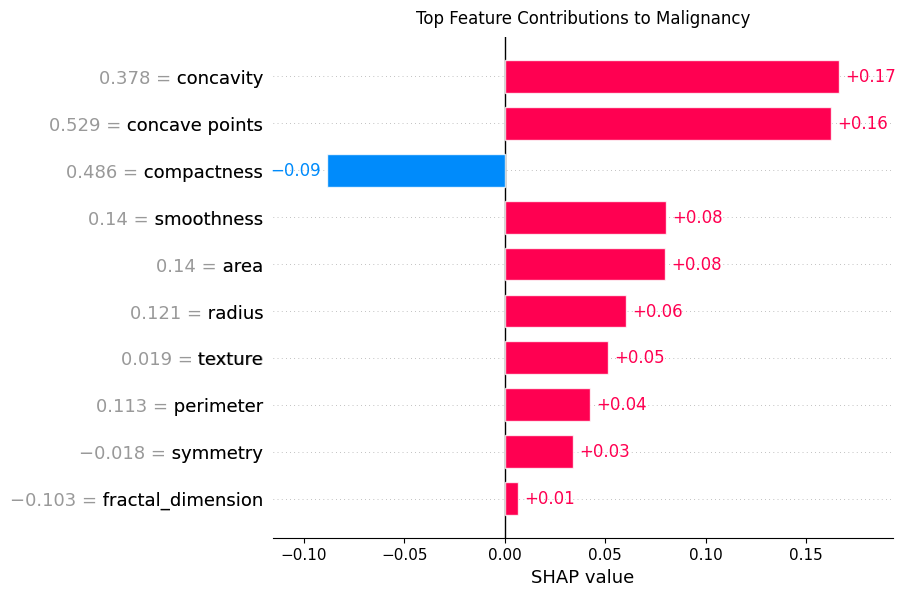

<Figure size 640x480 with 0 Axes>

In [14]:
import shap

# Prepare background data for SHAP (subset of training data)
num_background = min(100, len(X_train_scaled))
random_indices = np.random.choice(len(X_train_scaled), num_background, replace=False)
background = X_train_scaled[random_indices]

# Create SHAP DeepExplainer (for DNN model)
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values for the single sample
shap_values = explainer.shap_values(sample_scaled)
shap_vals = shap_values[0].squeeze()

# Convert tensor to float and create SHAP Explanation object
base_val = float(explainer.expected_value[0].numpy()) if tf.is_tensor(explainer.expected_value[0]) else float(explainer.expected_value[0])

sample_explanation = shap.Explanation(
    values=shap_vals,
    base_values=base_val,
    data=sample_scaled[0],
    feature_names=columns
)

# Plot Waterfall Chart
plt.title("Local Feature Contribution for Single Sample", fontsize=12, pad=10)
shap.plots.waterfall(sample_explanation, max_display=10)
plt.tight_layout()
plt.show()

# Bar Plot of Feature Importance
plt.title("Top Feature Contributions to Malignancy", fontsize=12, pad=10)
shap.plots.bar(sample_explanation, max_display=10)
plt.tight_layout()
plt.show()

#### SHAP explains how much each feature pushed the model’s prediction higher (toward malignant) or lower (toward benign).

- Positive SHAP values (red) indicate features that increase the probability of malignancy.
- Negative SHAP values (blue) indicate features that decrease the probability, pushing it toward benign.

#### From the waterfall plot, we observed that features such as `concavity` (+0.17) and `concave points` (+0.16) had the strongest positive influence, meaning that higher irregularities in the tumor’s shape significantly increased the probability of being classified as malignant. Other features like `smoothness`, `area`, and `radius` also contributed positively, suggesting that larger and less uniform cell structures further supported the malignant classification. In contrast, `compactness` (-0.09) slightly reduced the malignancy score, indicating a minor association with benign characteristics. 

#### The bar plot reinforces these observations by ranking the features according to their contribution magnitudes, showing that `concavity` and `concave points` are the most influential features. Overall, SHAP analysis demonstrates how XAI enhances transparency by revealing the internal reasoning of the DNN model. This allows medical experts to understand, trust, and validate the model’s predictions, ensuring that high-performance models remain interpretable and reliable in real-world healthcare applications.